# Classification with scikit-learn: hand-written digit recognition

This notebook demonstrates how to use `scikit-learn` to classify hand-written digits (the full MNIST data set).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Scikit-Learn includes a small subset of the data (1797 images, each 8 x 8 pixels):

# from sklearn.datasets import load_digits
# digits = load_digits()
# X = digits['data']
# y = digits['target']
# X.shape, y.shape

In [3]:
mnist = np.load('../Data/mnist.npz')
X = mnist['X']
y = mnist['y']

In [4]:
X.shape, y.shape

((70000, 784), (70000,))

In [5]:
digit0 = X[0].reshape(28, 28)

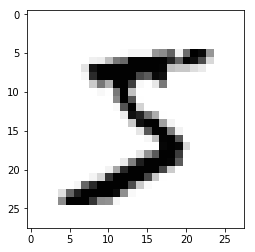

In [6]:
plt.imshow(digit0, cmap='Greys')

In [7]:
X.dtype, y.dtype

(dtype('float32'), dtype('int64'))

In [8]:
X_train, X_test = X[:60000], X[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

In [9]:
# Equivalent but randomized:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000)

In [10]:
def show_digit(features, ax=None):
    (ax or plt).imshow(features.reshape(28, 28), cmap='Greys', interpolation='none')

label: 1


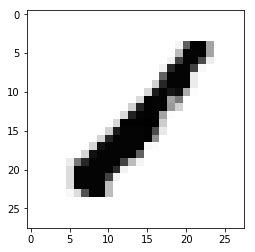

In [11]:
# Show first digit in training set
show_digit(X_train[0])
print('label: {}'.format(y_train[0]))

### Classification

We can fit a variety of models using Scikit-Learn for classification. Here we show a classifier based on support vector machines (See Vapnik, 1995).

In [12]:
from sklearn.svm import SVC

In [13]:
clf = SVC()

In [14]:
# clf.fit(X_train, y_train)

This takes a long time. The time to train support-vector machines scales as $O(n^2)$ up to $O(n^3)$ in the training set size $n$, depending on the misclassification penalty parameter $C$.

Other algorithms are faster:

In [15]:
from sklearn.ensemble import RandomForestClassifier
    
clf = RandomForestClassifier()

In [16]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [17]:
predictions = clf.predict(X_test)

In [22]:
indices_incorrect = (predictions != y_test).nonzero()[0]
indices_incorrect[:20]

array([ 22,  37,  61,  62,  70,  93,  98, 115, 130, 132, 134, 141, 147,
       148, 155, 176, 182, 194, 212, 236])

### Example incorrect classification

In [23]:
y_test[indices_incorrect[0]]

8

In [24]:
predictions[indices_incorrect[0]]

2

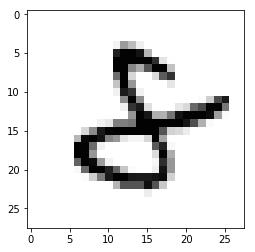

In [25]:
show_digit(X_test[indices_incorrect[0]])

### Measuring classification accuracy

In [29]:
preds = clf.predict(X_test)

In [30]:
preds

array([0, 1, 3, ..., 0, 7, 1])

In [31]:
len(preds)

10000

In [32]:
print(preds[0:20])
print(y_test[0:20])

[0 1 3 0 1 0 8 5 7 3 3 1 2 6 2 8 6 7 1 6]
[0 1 3 0 1 0 8 5 7 3 3 1 2 6 2 8 6 7 1 6]


In [33]:
def success_rate(preds, targets):
    return (preds == y_test).mean()

In [34]:
success_rate(preds, y_test)

0.94720000000000004

Scikit-Learn has tools to help with model evaluation:

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(preds, y_test)

0.94720000000000004

In [39]:
def show_failed_predictions(preds, targets, features, shape=(3,3)):
    """
    Illustrates a random set of digit images from a test set with
    their actual labels and predicted labels.
    """
    failed = np.where((preds - targets)**2)[0]
    num_to_show = min([len(failed), shape[0]*shape[1]])
    chosen = np.random.choice(failed, size=num_to_show, replace=False)
        
    fig, axes = plt.subplots(*shape, figsize=(9, 9))
    fig.tight_layout(pad=2)
    for i in range(num_to_show):
        f = chosen[i]
        show_digit(features[f], ax=axes.flat[i])
        caption = 'Actual: {}. Prediction: {}'.format(targets[f], preds[f])
        axes.flat[i].set_xlabel(caption)

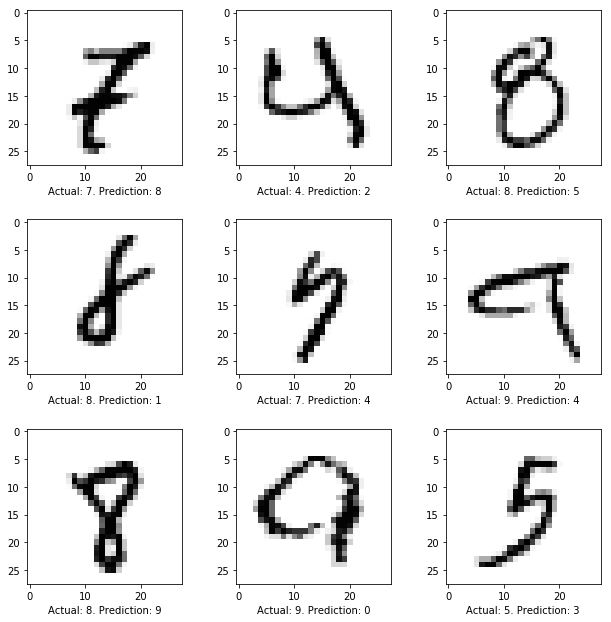

In [40]:
show_failed_predictions(preds, y_test, X_test)

### Cross-validation

The classification accuracy depends on the random selection of samples in the training and test sets. Common practice in machine learning is to estimate a model's true accuracy by averaging the accuracy across multiple runs of splitting the data into training and test sets.

In [45]:
from sklearn.model_selection import cross_val_predict

In [46]:
preds = cross_val_predict(clf, X_train, y_train, cv=10)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(y_train, preds)

0.94450000000000001

All classifiers have "hyper-parameters":

In [29]:
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 8,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Scikit-Learn also encourages optimizing models by performing "grid searches" over these hyperparameters. See the docs for `sklearn.model_selection` for more information. Note that this increases the need for large dataset sizes.

## References

Support vector machines:

-  Cortes, C.; Vapnik, V. (1995). "Support-vector networks". Machine Learning. 20 (3): 273–297. doi:10.1007/BF00994018.

Scikit-Learn:

- Jake Vanderplas's tutorial on Scikit-Learn from SciPy 2013: https://github.com/jakevdp/sklearn_tutorial.git